# Association Rules Analysis

## 1. Prepare

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("ratings.csv")
df.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [5]:
df['userId'].value_counts()

547    2391
564    1868
624    1735
15     1700
73     1610
       ... 
296      20
289      20
249      20
221      20
1        20
Name: userId, Length: 671, dtype: int64

In [6]:
df['movieId'].value_counts()

356       341
296       324
318       311
593       304
260       291
         ... 
98604       1
103659      1
104419      1
115927      1
6425        1
Name: movieId, Length: 9066, dtype: int64

## 2. Data Preprocessing

In [7]:
df_new = df.groupby(['userId'])['movieId'].apply(list)
df_new = df_new.index.to_frame(name='userId').join(df_new)
df_new = df_new.reset_index(drop=True)
df_new

,userId,movieId
0,1,"[31, 1029, 1061, 1129, 1172, 1263, 1287, 1293,..."
1,2,"[10, 17, 39, 47, 50, 52, 62, 110, 144, 150, 15..."
2,3,"[60, 110, 247, 267, 296, 318, 355, 356, 377, 5..."
3,4,"[10, 34, 112, 141, 153, 173, 185, 260, 289, 29..."
4,5,"[3, 39, 104, 141, 150, 231, 277, 344, 356, 364..."
...,...,...
666,667,"[6, 11, 16, 17, 21, 25, 32, 36, 41, 58, 82, 95..."
667,668,"[296, 318, 593, 608, 720, 1089, 1213, 1221, 12..."
668,669,"[223, 260, 381, 480, 785, 913, 968, 1135, 1210..."
669,670,"[1, 25, 32, 34, 36, 47, 50, 110, 150, 318, 457..."


In [8]:
df_new = pd.DataFrame(df_new.movieId.values.tolist(), df_new.index)
df_new

,0,1,2,3,4,5,6,7,8,9,...,2381,2382,2383,2384,2385,2386,2387,2388,2389,2390
0,31,1029,1061,1129,1172,1263,1287,1293,1339,1343,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10,17,39,47,50,52,62,110,144,150,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,60,110,247,267,296,318,355,356,377,527,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10,34,112,141,153,173,185,260,289,296,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,39,104,141,150,231,277,344,356,364,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666,6,11,16,17,21,25,32,36,41,58,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
667,296,318,593,608,720,1089,1213,1221,1233,1358,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
668,223,260,381,480,785,913,968,1135,1210,1304,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
669,1,25,32,34,36,47,50,110,150,318,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Reformat data to the approriate format

In [9]:
records = []
num_rows = df_new.shape[0]
num_cols = df_new.shape[1]
for i in range(num_rows):
    this_row = []
    for j in range(num_cols):
        this_row.append(str(df_new.iloc[i,j]))
    ## add this row to records
    records.append(this_row)

### Use TransactionalEncoder

In [10]:
from mlxtend.preprocessing import TransactionEncoder

In [12]:
te = TransactionEncoder()
te_ary = te.fit(records).transform(records)
data_new = pd.DataFrame(te_ary,columns=te.columns_)
data_new = data_new.drop(['nan'],axis=1)
data_new.head()

,1,10,100,100.0,100017.0,100032.0,100034.0,100083.0,100106.0,100159.0,...,99811.0,99813.0,99839.0,99846.0,999,999.0,99912.0,99917.0,99992.0,nan
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [13]:
te_ary

array([[False, False, False, ..., False, False,  True],
       [False,  True, False, ..., False, False,  True],
       [False, False, False, ..., False, False,  True],
       ...,
       [False, False, False, ..., False, False,  True],
       [ True, False, False, ..., False, False,  True],
       [ True, False, False, ..., False, False,  True]])

In [14]:
te.columns_

['1',
 '10',
 '100',
 '100.0',
 '100017.0',
 '100032.0',
 '100034.0',
 '100083.0',
 '100106.0',
 '100159.0',
 '100163.0',
 '100226.0',
 '100272.0',
 '1003.0',
 '100304.0',
 '100306.0',
 '100326.0',
 '100365.0',
 '100383.0',
 '100390.0',
 '1004.0',
 '100450.0',
 '100487.0',
 '100498.0',
 '1005',
 '1005.0',
 '100517.0',
 '100527.0',
 '100553.0',
 '100556.0',
 '100581.0',
 '1006.0',
 '1007',
 '1007.0',
 '100714.0',
 '100745.0',
 '1008.0',
 '100843.0',
 '1009',
 '1009.0',
 '101',
 '101.0',
 '1010',
 '1010.0',
 '101025.0',
 '101070.0',
 '101076.0',
 '101088.0',
 '1011',
 '1011.0',
 '101106.0',
 '101112.0',
 '101142.0',
 '1012.0',
 '101283.0',
 '101285.0',
 '1013',
 '1013.0',
 '101360.0',
 '101362.0',
 '1014.0',
 '101415.0',
 '1015',
 '1015.0',
 '101525.0',
 '101529.0',
 '101531.0',
 '101577.0',
 '1016.0',
 '101612.0',
 '1017',
 '1017.0',
 '101741.0',
 '1018.0',
 '101850.0',
 '101864.0',
 '101884.0',
 '101895.0',
 '1019',
 '1019.0',
 '101904.0',
 '101947.0',
 '101962.0',
 '102',
 '102.0',
 '

## 3. Build Model

In [11]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [12]:
# Find frequent itemsets using Apriori
frequent_itemsets = apriori(data_new, min_support=0.1, use_colnames=True)

In [13]:
frequent_itemsets.head(5)

,support,itemsets
0,0.368107,(1)
1,0.181818,(10)
2,0.104322,(1028.0)
3,0.110283,(1035.0)
4,0.180328,(1036.0)


## 4. Association Rules Mining

In [14]:
# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)

In [28]:
# Top 5 item sets
rules.sort_values('confidence', ascending=False).head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
44704,"(377.0, 597.0, 367.0, 480.0)",(356.0),0.102832,0.217586,0.102832,1.0,4.595890,0.080457,inf,0.872093
30091,"(377.0, 588.0, 364.0)",(356.0),0.111773,0.217586,0.111773,1.0,4.595890,0.087453,inf,0.880872
41225,"(1198.0, 1036.0, 1291.0, 1210.0)",(1196.0),0.101341,0.242921,0.101341,1.0,4.116564,0.076723,inf,0.842454
30399,"(597.0, 457.0, 364.0)",(356.0),0.102832,0.217586,0.102832,1.0,4.595890,0.080457,inf,0.872093
4954,"(10, 377.0)",(480.0),0.108793,0.238450,0.108793,1.0,4.193750,0.082851,inf,0.854515


In [16]:
print("number of rules: ", rules.shape[0])

number of rules:  51058


### Cho biết movie có Id = 10 thường được xem chung với các movie nào? 

In [17]:
rules_new = rules.copy()

In [24]:
for row in rules_new.iterrows():
    if('10' in row[1][0]):
        print(row[1][1])

frozenset({'110'})
frozenset({'344.0'})
frozenset({'356.0'})
frozenset({'377.0'})
frozenset({'380.0'})
frozenset({'457.0'})
frozenset({'47'})
frozenset({'480.0'})
frozenset({'500.0'})
frozenset({'588.0'})
frozenset({'589.0'})
frozenset({'590.0'})
frozenset({'592.0'})
frozenset({'593.0'})
frozenset({'597.0'})
frozenset({'780.0'})
frozenset({'356.0'})
frozenset({'377.0'})
frozenset({'377.0', '356.0'})
frozenset({'356.0'})
frozenset({'457.0'})
frozenset({'457.0', '356.0'})
frozenset({'480.0'})
frozenset({'356.0'})
frozenset({'480.0', '356.0'})
frozenset({'356.0'})
frozenset({'589.0'})
frozenset({'589.0', '356.0'})
frozenset({'592.0'})
frozenset({'356.0'})
frozenset({'592.0', '356.0'})
frozenset({'480.0'})
frozenset({'377.0'})
frozenset({'377.0', '480.0'})
frozenset({'380.0'})
frozenset({'457.0'})
frozenset({'457.0', '380.0'})
frozenset({'380.0'})
frozenset({'480.0'})
frozenset({'380.0', '480.0'})
frozenset({'480.0'})
frozenset({'457.0'})
frozenset({'457.0', '480.0'})
frozenset({'589.0'})


### Tìm top 10 movie được nhiều users xem nhất

In [19]:
top10 = data_new.apply(pd.value_counts).fillna(0)
top10 = top10.iloc[1,:]
top10 = top10.sort_values(ascending=False)
top10.head(10)

1         247
2571.0    222
260       215
296       209
110       201
2858.0    201
318       198
47        197
50        196
32        196
Name: True, dtype: int64

Text(0.5, 0, 'name')

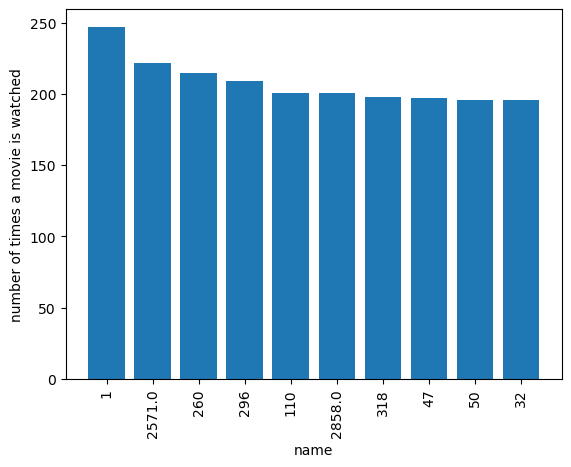

In [20]:
x = top10.head(10).index.values
y = top10.head(10).values
plt.bar(x,y)
plt.xticks(rotation='vertical')
plt.ylabel('number of times a movie is watched')
plt.xlabel('name')

**NOTE: Bộ phim có id 1 là bộ phim được xem nhiều nhất**